# Week4 授業前課題2 住宅価格の予測

## 住宅価格の回帰

Week3で使用したアイオワ州エイムズ市の住宅価格データセットを使い、回帰問題を解く練習をします。

79種類の特徴量（説明変数）を活用し、住宅価格の数値を推測する問題が設定できます。こういった連続値のものを推測する問題を回帰問題と呼びます。

[House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

### 今回使う手法の一覧
scikit-laernを使い以下の手法で学習と推定を行っていきます。それぞれの手法についての詳細は今の段階では扱いません。ライブラリを使えばどれも気軽に利用できることや、手法毎の結果に違いがあることを簡単に見ていきます。

- 線形回帰
- SVM
- 決定木
- ランダムフォレスト

分類問題と回帰問題の両方で使える手法と、そうではない手法が存在します。

## データセットの準備

Week3同様にKaggleからデータセットをダウンロードしてください。`train.csv`のみを使用します。

[House Prices: Advanced Regression Techniques | Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

## 回帰問題の流れ

回帰問題の流れは分類問題と基本的には同じですから、課題1のように細かい説明は行いません。

### 練習のための準備
このデータセットには79種類の特徴量（目的変数）がありますが、Week3で探索して分かったように様々なタイプのデータ含まれています。これをどう前処理するかということは機械学習において重要な箇所ですが、今回は回帰問題の学習や評価の練習を優先するため、説`GrLivArea`と`YearBuilt`の2つだけを利用することにします。

## 【問題1】練習のために特徴量の選択
データセットを読み込んだ後、`GrLivArea`と`YearBuilt`を抜き出してください。

In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 80)
df = pd.read_csv('train.csv', index_col= 'Id')
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
df_1 = df.loc[:, ['GrLivArea', 'YearBuilt', 'SalePrice']]
df_1

,GrLivArea,YearBuilt,SalePrice
Id,,,
1,1710,2003,208500
2,1262,1976,181500
3,1786,2001,223500
4,1717,1915,140000
5,2198,2000,250000
...,...,...,...
1456,1647,1999,175000
1457,2073,1978,210000
1458,2340,1941,266500


In [3]:
X1 = df_1.iloc[:, [0, 1]].values
y1 = df_1.iloc[:, -1].values
X1, y1

(array([[1710, 2003],
        [1262, 1976],
        [1786, 2001],
        ...,
        [2340, 1941],
        [1078, 1950],
        [1256, 1965]]),
 array([208500, 181500, 223500, ..., 266500, 142125, 147500]))

## 【問題2】線形回帰による推定と評価
データを簡単に分析、前処理し、 線形回帰 による学習、推定、評価、可視化までの一連の流れを作成・実行してください。

[sklearn.linear_model.LinearRegression — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

評価のための指標値は回帰問題では **平均二乗誤差（Mean Squared Error, MSE）** を使うことが一般的です。

[sklearn.metrics.mean_squared_error — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)

可視化は横軸にある特徴量、縦軸に推測した住宅価格といった方法で行えます。

In [4]:
# データ分析
display(df_1.describe())
display(df_1.info())

,GrLivArea,YearBuilt,SalePrice
count,1460.000000,1460.000000,1460.000000
mean,1515.463699,1971.267808,180921.195890
std,525.480383,30.202904,79442.502883
min,334.000000,1872.000000,34900.000000
25%,1129.500000,1954.000000,129975.000000
50%,1464.000000,1973.000000,163000.000000
75%,1776.750000,2000.000000,214000.000000
max,5642.000000,2010.000000,755000.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   GrLivArea  1460 non-null   int64
 1   YearBuilt  1460 non-null   int64
 2   SalePrice  1460 non-null   int64
dtypes: int64(3)
memory usage: 45.6 KB


None

/Users/ikeda/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


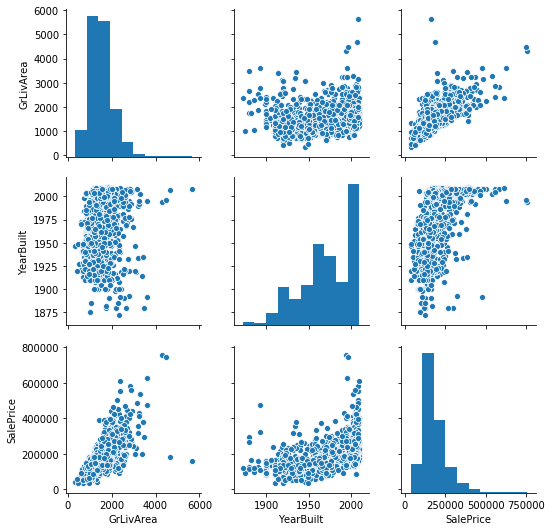

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.pairplot(df_1);

In [6]:
# 前処理
# 訓練データと検証データの分割（検証データ２５％）
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, random_state=0, test_size=0.25)
len(X1_train), len(X1_test)

(1095, 365)

In [7]:
# 前処理
# 平均値に差があるため、標準化を行う
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
scaler1.fit(X1_train)
X1_train_trans = scaler1.transform(X1_train)
X1_test_trans = scaler1.transform(X1_test)

In [8]:
# 推定
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression()
lr1.fit(X1_train_trans, y1_train)
y1_pred_lr = lr1.predict(X1_test_trans)

In [9]:
# 評価　平均二乗誤差
from sklearn.metrics import mean_squared_error
lr1_error = mean_squared_error(y1_test, y1_pred_lr)
lr1_error

2725908099.063638

In [10]:
# 評価　決定係数
lr1_score = lr1.score(X1_train_trans, y1_train)
lr1_score

0.6769659997783976

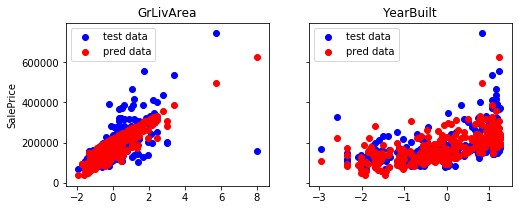

In [11]:
# 可視化
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
ax1.scatter(X1_test_trans[:, 0], y1_test, color='blue', label='test data')
ax1.scatter(X1_test_trans[:, 0], y1_pred_lr, color='red', label='pred data')
ax1.set_title('GrLivArea')
ax1.set_ylabel('SalePrice')
ax1.legend()
ax2.scatter(X1_test_trans[:, 1], y1_test, color='blue', label='test data')
ax2.scatter(X1_test_trans[:, 1], y1_pred_lr, color='red', label='pred data')
ax2.set_title('YearBuilt')
ax2.legend()
plt.show()

In [12]:
# 他のメソッド
lr1.coef_, lr1.intercept_, lr1.get_params()

(array([50915.49019418, 31435.11963558]),
 180733.1497716894,
 {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False})

## 【問題3】手法の比較
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と可視化した図を利用して結果を簡単に考察してください。どの手法がどの指標値が良かったかや、どういった図になっていたかを述べてください。

- 線形回帰
- SVM
- 決定木
- ランダムフォレスト

公式ドキュメントへのリンクは以下です。本来はパラメータチューニングを行いますが、まずはデフォルトの値で実行しましょう。

- [sklearn.linear_model.LinearRegression — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
- [sklearn.svm.SVR — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)
- [sklearn.tree.DecisionTreeRegressor — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
- [sklearn.ensemble.RandomForestRegressor — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

SVM、決定木、ランダムフォレストは分類問題でも使用した手法ですが、回帰問題用のライブラリはそれぞれ専用のものに分かれています。

In [13]:
# SVM
from sklearn.svm import SVR
svr1 = SVR()
svr1.fit(X1_train_trans, y1_train)
y1_pred_svr = svr1.predict(X1_test_trans)

In [14]:
# 評価 平均二乗誤差
svr1_error = mean_squared_error(y1_test, y1_pred_svr)
svr1_error

6943346839.259772

In [15]:
# 決定木
from sklearn.tree import DecisionTreeRegressor
tree1 = DecisionTreeRegressor(random_state=0)
tree1.fit(X1_train_trans, y1_train)
y1_pred_tree = tree1.predict(X1_test_trans)

In [16]:
# 評価 平均二乗誤差
tree1_error = mean_squared_error(y1_test, y1_pred_tree)
tree1_error

2911549850.739117

In [17]:
# ランダムフォレスト
from sklearn.ensemble import RandomForestRegressor
forest1 = RandomForestRegressor(n_estimators=10, random_state=0)
forest1.fit(X1_train_trans, y1_train)
y1_pred_forest = forest1.predict(X1_test_trans)

In [18]:
# 評価 平均二乗誤差
forest1_error = mean_squared_error(y1_test, y1_pred_forest)
forest1_error

2057106105.9171822

In [19]:
# 可視化
method_lst = ['LinearRegression', 'SVM', 'DecisionTree', 'RandomForest']
y1_pred_lst = [y1_pred_lr, y1_pred_svr, y1_pred_tree, y1_pred_forest]
error1_lst = [lr1_error, svr1_error, tree1_error, forest1_error]
df_error = pd.DataFrame(columns=method_lst+['mean_squared_error']).set_index('mean_squared_error')
df_error.loc['error1'] = error1_lst

,LinearRegression,SVM,DecisionTree,RandomForest
mean_squared_error,,,,
error1,2.725908e+09,6.943347e+09,2.911550e+09,2.057106e+09


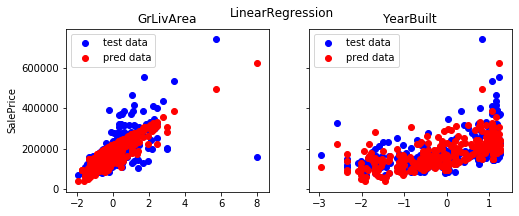

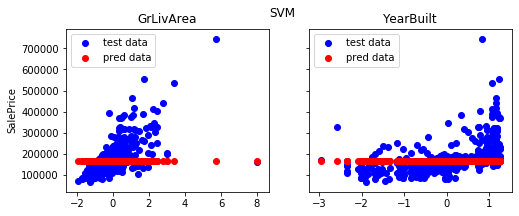

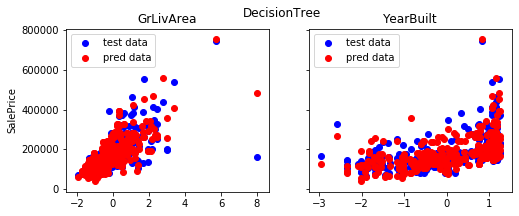

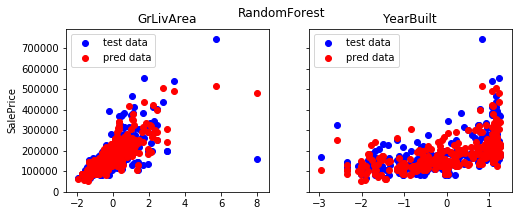

In [20]:
# error1
display(df_error)
for method, y1_pred in zip(method_lst, y1_pred_lst):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
    fig.suptitle(method)
    ax1.scatter(X1_test_trans[:, 0], y1_test, color='blue', label='test data')
    ax1.scatter(X1_test_trans[:, 0], y1_pred, color='red', label='pred data')
    ax1.set_title('GrLivArea')
    ax1.set_ylabel('SalePrice')
    ax1.legend()
    ax2.scatter(X1_test_trans[:, 1], y1_test, color='blue', label='test data')
    ax2.scatter(X1_test_trans[:, 1], y1_pred, color='red', label='pred data')
    ax2.set_title('YearBuilt')
    ax2.legend()
    plt.show()

指標値は、SVMをのぞいてに通った数値になっている。
しかし、線形回帰では予測データが中央に集まっている傾向があるため、その他指標を用いれば、決定木、ランダムフォレストの方があてはまりが良いと想定される

## 【問題4】（アドバンス課題）他の特徴量も使用しての学習
ここまでは練習のために2つの特徴量だけを使いましたが、他の特徴量を加えるとどのようになるか検証してください。どう選択・加工するかにはデータ分析が重要になってきます。

KaggleのNotebooksも参考にできます。

[House Prices: Advanced Regression Techniques | Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/kernels)

In [21]:
# 訓練データと検証データ、選択した特徴量のリストを引数に４つの手法で平均二乗誤差、グラフ表示を行う
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
def Regression(X_train, X_test, y_train, y_test, feature_lst):
    # 4つの手法で予測
    method_lst = ['LinearRegression', 'SVM', 'DecisionTree', 'RandomForest']
    lr = LinearRegression().fit(X_train, y_train).predict(X_test)
    svr = SVR().fit(X_train, y_train).predict(X_test)
    tree = DecisionTreeRegressor(random_state=0).fit(X_train, y_train).predict(X_test)
    forest = RandomForestRegressor(random_state=0, n_estimators=10).fit(X_train, y_train).predict(X_test)
    y_pred_lst = [lr, svr, tree, forest]
    # エラー計算し、表にまとめる
    error_lst = [mean_squared_error(y_test, lr), mean_squared_error(y_test, svr), mean_squared_error(y_test, tree), mean_squared_error(y_test, forest)]
    df_error.loc['error{}'.format(len(df_error)+1)] = error_lst
    display(df_error)
    # 散布図の表示　y軸は目的変数　x軸は各特徴量
    # 特徴量が１０個以下の時にグラフ表示
    if len(feature_lst) <= 10:
        for method, y_pred in zip(method_lst, y_pred_lst):
            fig, axes = plt.subplots(1, len(feature_lst), figsize=(4*len(feature_lst), 3), sharey=True)
            fig.suptitle(method)
            for i in range(len(feature_lst)):
                axes[i].scatter(X_test[:, i], y_test, color='blue', label='test data')
                axes[i].scatter(X_test[:, i], y_pred, color='red', label='pred data')
                axes[i].set_title(feature_lst[i])
                axes[i].set_ylabel('SalePrice')
                axes[i].legend()
            plt.show()

In [22]:
df.corr()['SalePrice']

MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePrice, dtype: float64

- まず最初に、数値の特徴量と販売価格との相関係数を確認する

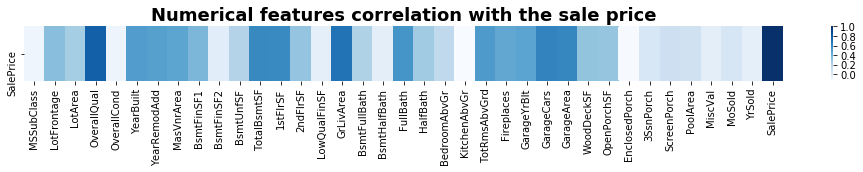

In [23]:
# 販売価格との相関係数のヒートマップ
fig, ax = plt.subplots(figsize=(17,1))
plt.title("Numerical features correlation with the sale price", weight='bold', fontsize=18)
sns.heatmap(df.corr().tail(1), cmap='Blues');

In [24]:
# 販売価格との相関係数を大きい順に並べる
df.corr()['SalePrice'].sort_values(ascending=False).to_frame().head(12)

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


In [25]:
# error2
# SalePriceと相関係数が高い変数を加えてみる　'OverallQual', 'GarageCars'
feature_lst = ['GrLivArea', 'YearBuilt', 'OverallQual', 'GarageCars']
df_2 = df.loc[:, feature_lst + ['SalePrice']]
df_2.describe()

,GrLivArea,YearBuilt,OverallQual,GarageCars,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1515.463699,1971.267808,6.099315,1.767123,180921.195890
std,525.480383,30.202904,1.382997,0.747315,79442.502883
min,334.000000,1872.000000,1.000000,0.000000,34900.000000
25%,1129.500000,1954.000000,5.000000,1.000000,129975.000000
50%,1464.000000,1973.000000,6.000000,2.000000,163000.000000
75%,1776.750000,2000.000000,7.000000,2.000000,214000.000000
max,5642.000000,2010.000000,10.000000,4.000000,755000.000000


In [26]:
X2 = df_2.iloc[:, 0:len(feature_lst)].values
y2 = df_2.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X2, y2, random_state=0, test_size=0.25)
# 標準化
from sklearn.preprocessing import StandardScaler
X_train_trans = StandardScaler().fit(X_train).transform(X_train)
X_test_trans = StandardScaler().fit(X_train).transform(X_test)

,LinearRegression,SVM,DecisionTree,RandomForest
mean_squared_error,,,,
error1,2.725908e+09,6.943347e+09,2.911550e+09,2.057106e+09
error2,1.877384e+09,6.948122e+09,1.884085e+09,1.548893e+09


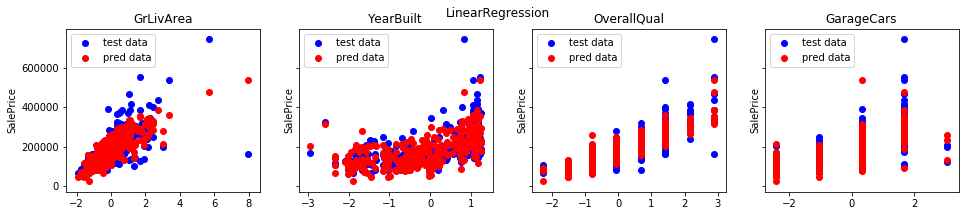

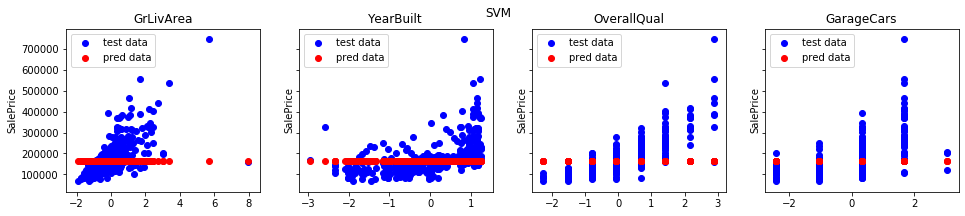

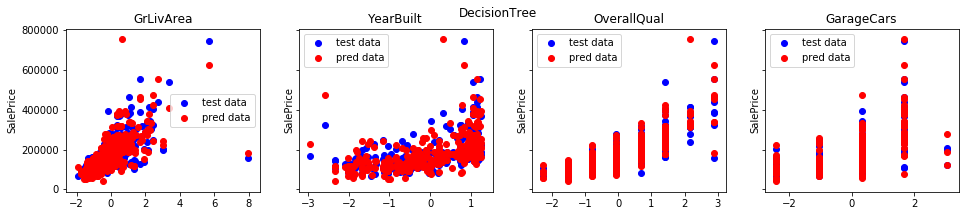

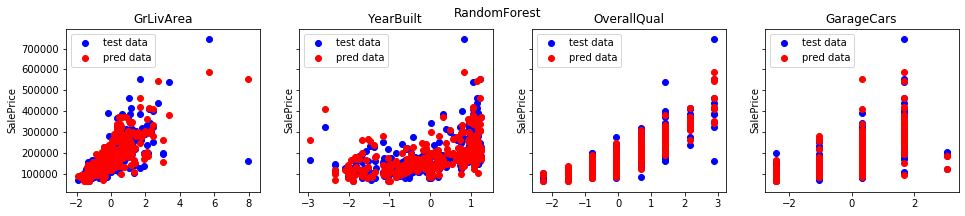

In [27]:
Regression(X_train_trans, X_test_trans, y_train, y_test, feature_lst)
# 2つの特徴量の時と比較して誤差は縮小

,LinearRegression,SVM,DecisionTree,RandomForest
mean_squared_error,,,,
error1,2.725908e+09,6.943347e+09,2.911550e+09,2.057106e+09
error2,1.877384e+09,6.948122e+09,1.884085e+09,1.548893e+09
error3,3.273388e-02,2.659804e-02,4.347160e-02,3.306688e-02


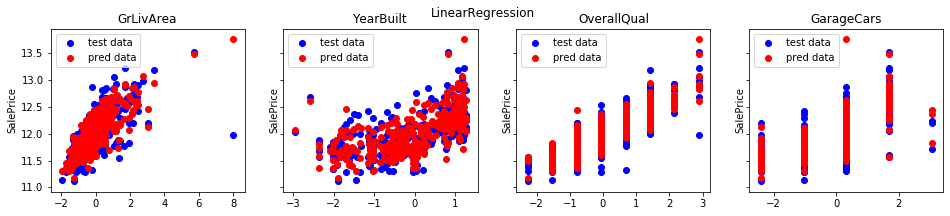

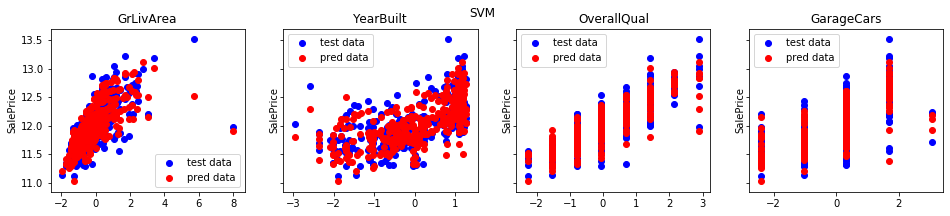

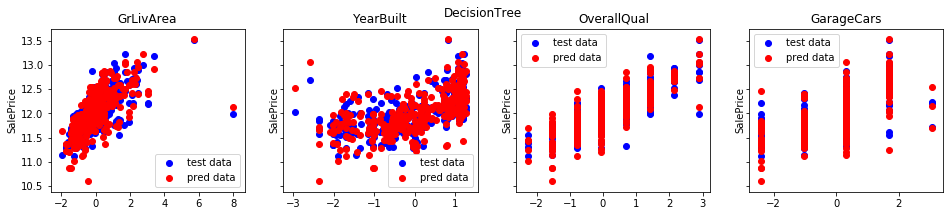

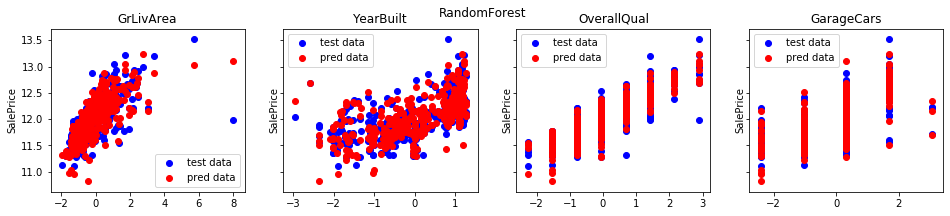

In [28]:
#　error3 erro2から目的変数を対数変換
y_train_log, y_test_log = np.log(y_train), np.log(y_test)
Regression(X_train_trans, X_test_trans, y_train_log, y_test_log, feature_lst)

In [29]:
# 販売価格との相関係数を大きい順に並べる
df.corr()['SalePrice'].sort_values(ascending=False).to_frame().head(12)

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


### 販売価格と相関係数が高い10個の特徴量の定義を確認
- OverallQual: Rates the overall material and finish of the house
       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
- GrLivArea: Above grade (ground) living area square feet
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- TotalBsmtSF: Total square feet of basement area
- 1stFlrSF: First Floor square feet
- BsmtFullBath: Basement full bathrooms
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

上記特徴量と販売価格の分布を確認してみる

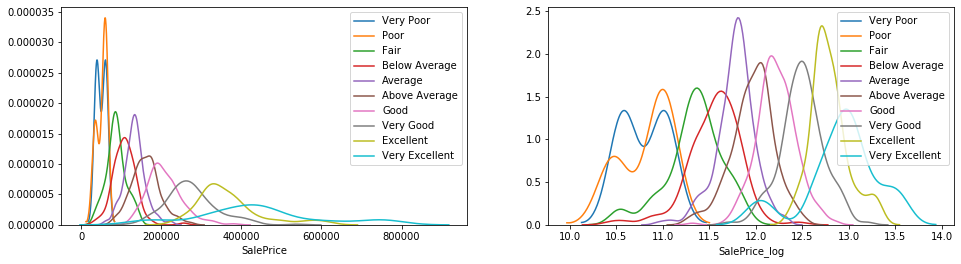

In [30]:
# OverallQual
df['SalePrice_log'] = np.log(df['SalePrice'])
OverallQual_dict={10:'Very Excellent', 9:'Excellent', 8:'Very Good', 7:'Good', 6:'Above Average', 5:'Average', 4:'Below Average', 3:'Fair', 2:'Poor', 1:'Very Poor'}
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
for i in range(1, 11):
    sns.kdeplot(df[df['OverallQual'] ==i]['SalePrice'], label=OverallQual_dict[i], ax=ax1)
    sns.kdeplot(df[df['OverallQual'] ==i]['SalePrice_log'], label=OverallQual_dict[i], ax=ax2)
ax1.set_xlabel('SalePrice')
ax2.set_xlabel('SalePrice_log')
plt.show()

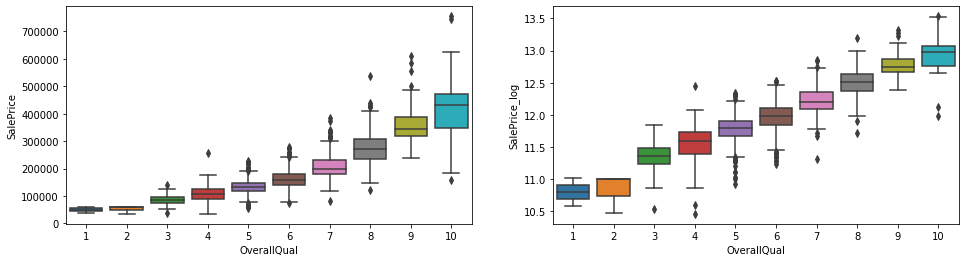

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.boxplot(data=df, x='OverallQual', y='SalePrice', ax=ax1)
sns.boxplot(data=df, x='OverallQual', y='SalePrice_log', ax=ax2)
plt.show()

In [32]:
df.corr().loc['OverallQual', ['SalePrice_log', 'SalePrice']]
#　販売価格を対数変換した方が相関関係は上昇

SalePrice_log    0.817184
SalePrice        0.790982
Name: OverallQual, dtype: float64

### OverallQual
- 販売価格を対数変換した方が相関関係は上昇

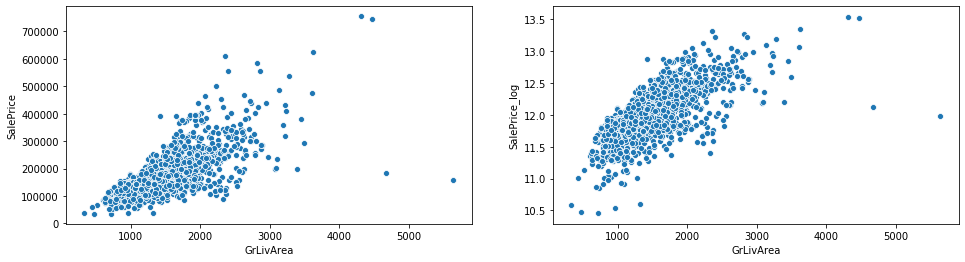

In [33]:
# GrLivArea
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.scatterplot(data=df, x='GrLivArea', y='SalePrice', ax=ax1)
sns.scatterplot(data=df, x='GrLivArea', y='SalePrice_log', ax=ax2)
plt.show()

In [34]:
df.corr().loc['GrLivArea', ['SalePrice_log', 'SalePrice']]

SalePrice_log    0.700927
SalePrice        0.708624
Name: GrLivArea, dtype: float64

In [35]:
# GarageCars
df['GarageCars'].isnull().sum()

0

In [36]:
df['GarageCars'].value_counts()

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

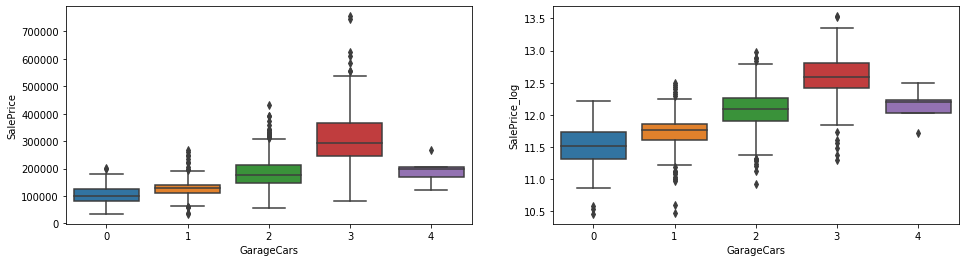

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.boxplot(data=df, x='GarageCars', y='SalePrice', ax=ax1)
sns.boxplot(data=df, x='GarageCars', y='SalePrice_log', ax=ax2)
plt.show()

### GarageCars
- ガレージ数３台まではせいの相関性が見て取れる。ガレージ数４台はサンプル数が少ないため、関係性は読み取れない

In [38]:
# GarageArea
df['GarageArea'].isnull().sum()

0

In [39]:
df['GarageArea'].value_counts()

0       81
440     49
576     47
240     38
484     34
        ..
754      1
459      1
458      1
756      1
1418     1
Name: GarageArea, Length: 441, dtype: int64

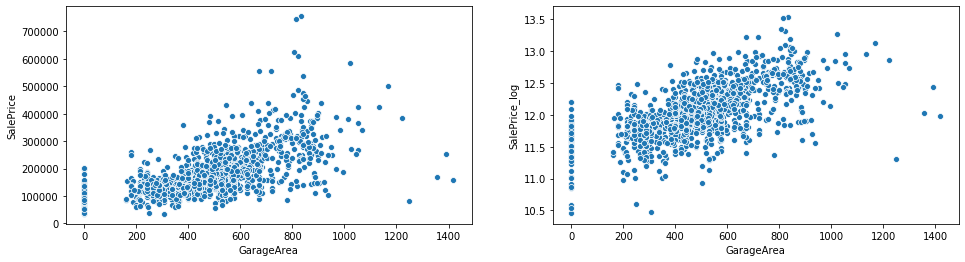

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.scatterplot(data=df, x='GarageArea', y='SalePrice', ax=ax1)
sns.scatterplot(data=df, x='GarageArea', y='SalePrice_log', ax=ax2)
plt.show()

In [41]:
# TotalBsmtSF
df['TotalBsmtSF'].isnull().sum()

0

In [42]:
df['TotalBsmtSF'].value_counts()

0       37
864     35
672     17
912     15
1040    14
        ..
1463     1
1459     1
1454     1
1019     1
2046     1
Name: TotalBsmtSF, Length: 721, dtype: int64

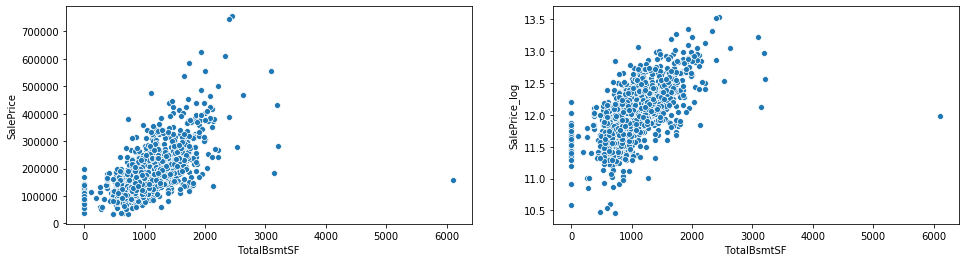

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.scatterplot(data=df, x='TotalBsmtSF', y='SalePrice', ax=ax1)
sns.scatterplot(data=df, x='TotalBsmtSF', y='SalePrice_log', ax=ax2)
plt.show()

In [44]:
# 1stFlrSF
df['1stFlrSF'].isnull().sum()

0

In [45]:
df['1stFlrSF'].value_counts()

864     25
1040    16
912     14
848     12
894     12
        ..
1285     1
1287     1
1288     1
1297     1
2053     1
Name: 1stFlrSF, Length: 753, dtype: int64

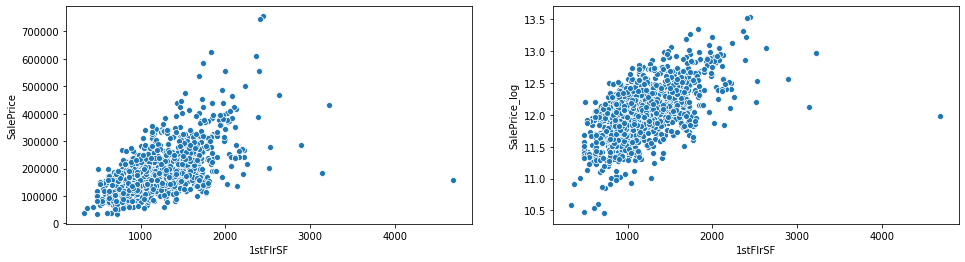

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.scatterplot(data=df, x='1stFlrSF', y='SalePrice', ax=ax1)
sns.scatterplot(data=df, x='1stFlrSF', y='SalePrice_log', ax=ax2)
plt.show()

In [47]:
# BsmtFullBath
df['BsmtFullBath'].isnull().sum()

0

In [48]:
df['BsmtFullBath'].value_counts()

0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64

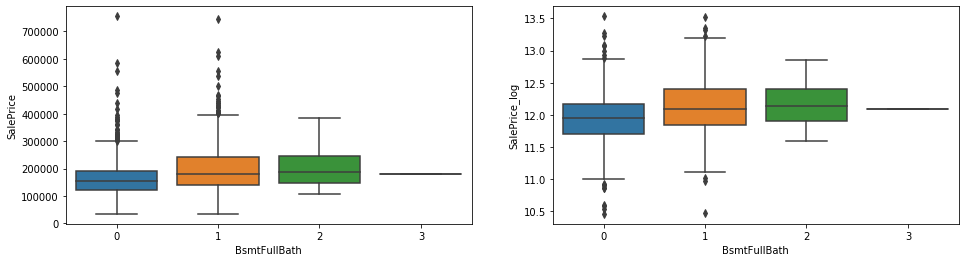

In [49]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.boxplot(data=df, x='BsmtFullBath', y='SalePrice', ax=ax1)
sns.boxplot(data=df, x='BsmtFullBath', y='SalePrice_log', ax=ax2)
plt.show()

In [50]:
# TotRmsAbvGrd
df['TotRmsAbvGrd'].isnull().sum()

0

In [51]:
df['TotRmsAbvGrd'].value_counts()

6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
14      1
2       1
Name: TotRmsAbvGrd, dtype: int64

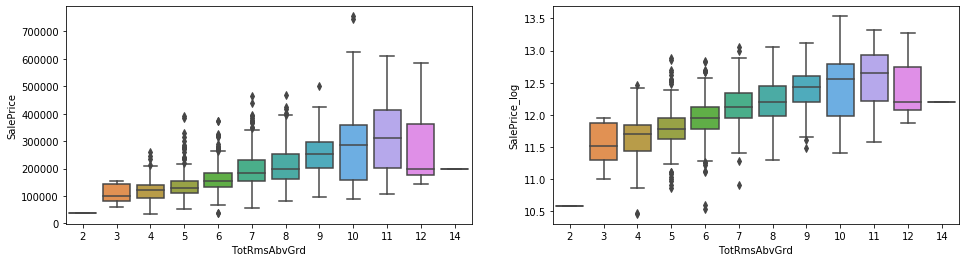

In [52]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.boxplot(data=df, x='TotRmsAbvGrd', y='SalePrice', ax=ax1)
sns.boxplot(data=df, x='TotRmsAbvGrd', y='SalePrice_log', ax=ax2)
plt.show()

In [53]:
# YearBuilt
df['YearBuilt'].isnull().sum()

0

In [54]:
df['YearBuilt'].value_counts()

2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1906     1
1911     1
1913     1
1917     1
1872     1
Name: YearBuilt, Length: 112, dtype: int64

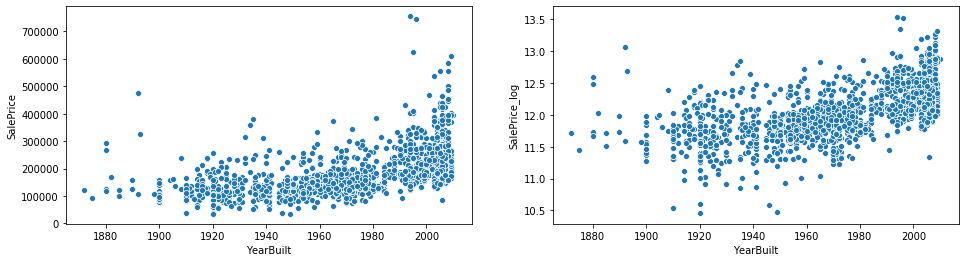

In [55]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.scatterplot(data=df, x='YearBuilt', y='SalePrice', ax=ax1)
sns.scatterplot(data=df, x='YearBuilt', y='SalePrice_log', ax=ax2)
plt.show()

In [56]:
# YearRemodAdd
df['YearRemodAdd'].isnull().sum()

0

In [57]:
df['YearRemodAdd'].value_counts()

1950    178
2006     97
2007     76
2005     73
2004     62
       ... 
2010      6
1983      5
1952      5
1986      5
1951      4
Name: YearRemodAdd, Length: 61, dtype: int64

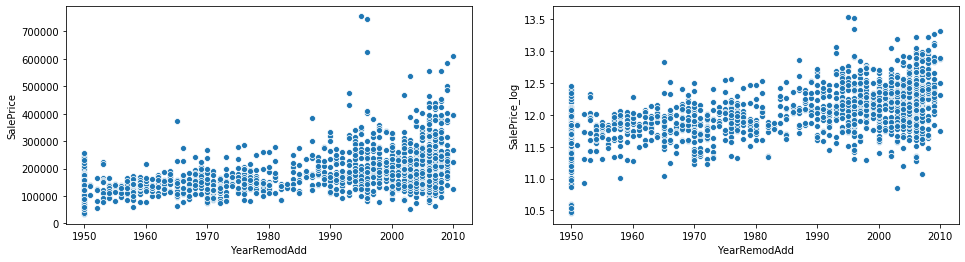

In [58]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.scatterplot(data=df, x='YearRemodAdd', y='SalePrice', ax=ax1)
sns.scatterplot(data=df, x='YearRemodAdd', y='SalePrice_log', ax=ax2)
plt.show()

In [59]:
# error4
# SalePriceと相関係数が高い10変数で検証
feature_lst = ['OverallQual', 'GrLivArea', 'GarageCars',  'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']
df_3 = df.loc[:, feature_lst + ['SalePrice']]
df_3.describe()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,1515.463699,1.767123,472.980137,1057.429452,1162.626712,1.565068,6.517808,1971.267808,1984.865753,180921.195890
std,1.382997,525.480383,0.747315,213.804841,438.705324,386.587738,0.550916,1.625393,30.202904,20.645407,79442.502883
min,1.000000,334.000000,0.000000,0.000000,0.000000,334.000000,0.000000,2.000000,1872.000000,1950.000000,34900.000000
25%,5.000000,1129.500000,1.000000,334.500000,795.750000,882.000000,1.000000,5.000000,1954.000000,1967.000000,129975.000000
50%,6.000000,1464.000000,2.000000,480.000000,991.500000,1087.000000,2.000000,6.000000,1973.000000,1994.000000,163000.000000
75%,7.000000,1776.750000,2.000000,576.000000,1298.250000,1391.250000,2.000000,7.000000,2000.000000,2004.000000,214000.000000
max,10.000000,5642.000000,4.000000,1418.000000,6110.000000,4692.000000,3.000000,14.000000,2010.000000,2010.000000,755000.000000


In [60]:
X3 = df_3.iloc[:, 0:len(feature_lst)].values
y3 = df_3.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X3, y3, random_state=0, test_size=0.25)
# 標準化
from sklearn.preprocessing import StandardScaler
X_train_trans = StandardScaler().fit(X_train).transform(X_train)
X_test_trans = StandardScaler().fit(X_train).transform(X_test)

,LinearRegression,SVM,DecisionTree,RandomForest
mean_squared_error,,,,
error1,2.725908e+09,6.943347e+09,2.911550e+09,2.057106e+09
error2,1.877384e+09,6.948122e+09,1.884085e+09,1.548893e+09
error3,3.273388e-02,2.659804e-02,4.347160e-02,3.306688e-02
error4,2.130448e+09,6.952793e+09,1.704227e+09,1.228392e+09


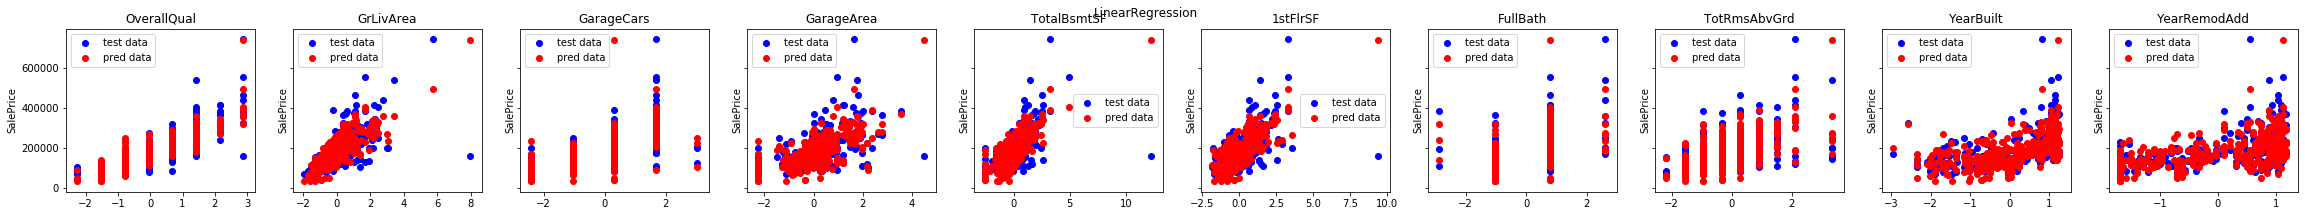

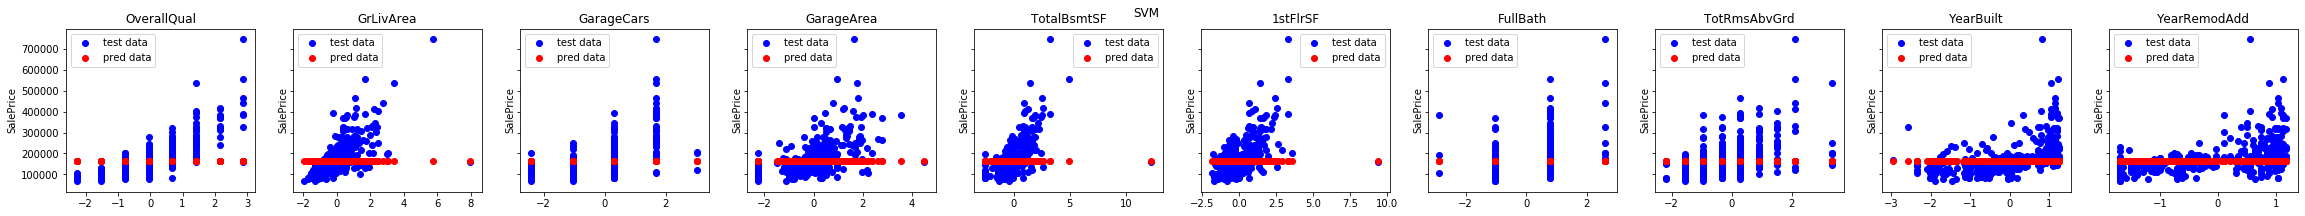

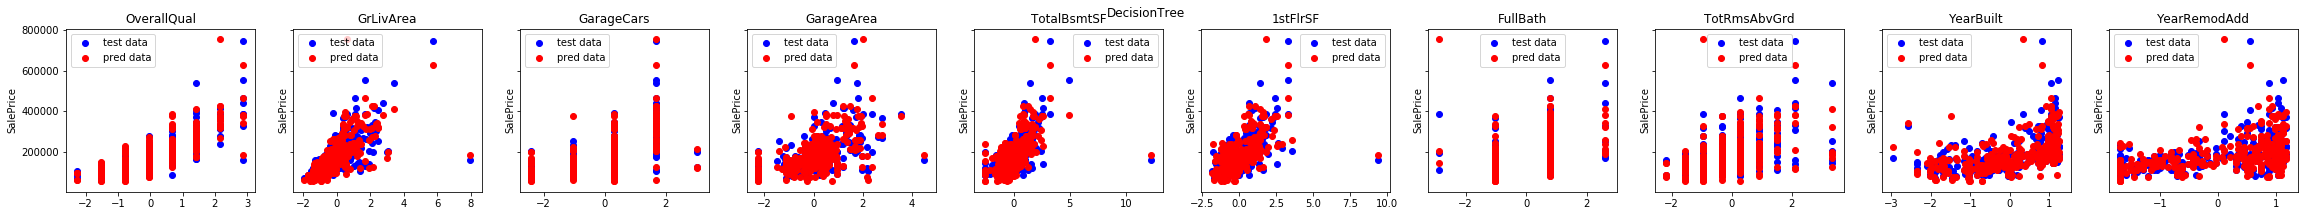

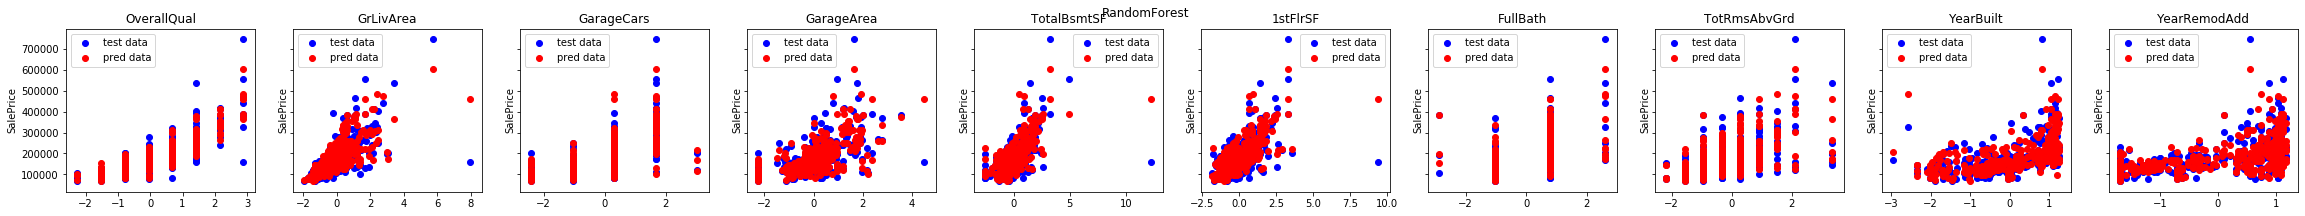

In [61]:
Regression(X_train_trans, X_test_trans, y_train, y_test, feature_lst)

特徴量を１０個に増やすと、RandomForestの誤差が大きく減少している

,LinearRegression,SVM,DecisionTree,RandomForest
mean_squared_error,,,,
error1,2.725908e+09,6.943347e+09,2.911550e+09,2.057106e+09
error2,1.877384e+09,6.948122e+09,1.884085e+09,1.548893e+09
error3,3.273388e-02,2.659804e-02,4.347160e-02,3.306688e-02
error4,2.130448e+09,6.952793e+09,1.704227e+09,1.228392e+09
error5,3.880275e-02,2.210765e-02,4.817972e-02,2.550681e-02


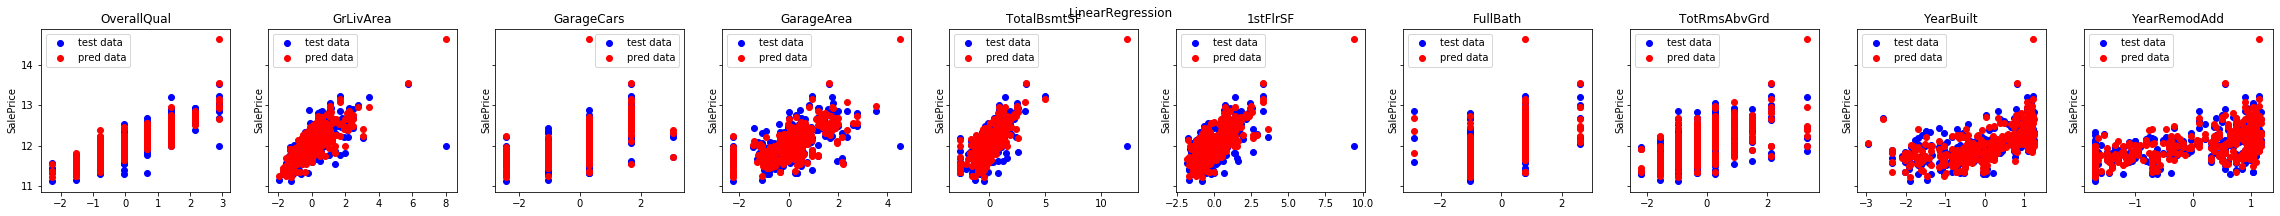

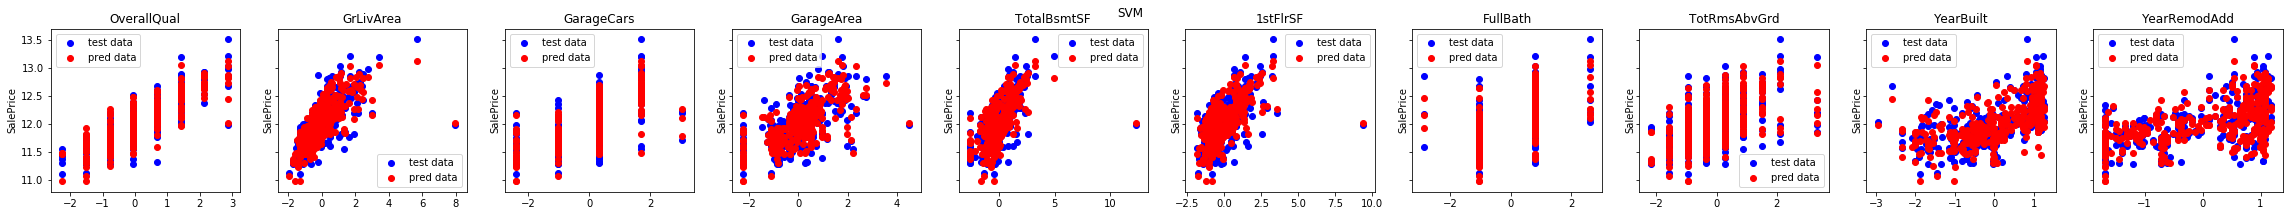

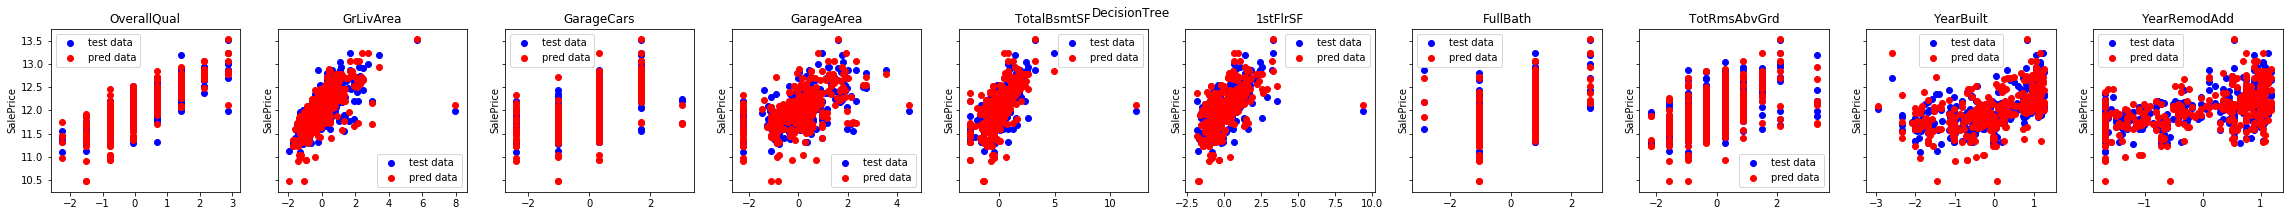

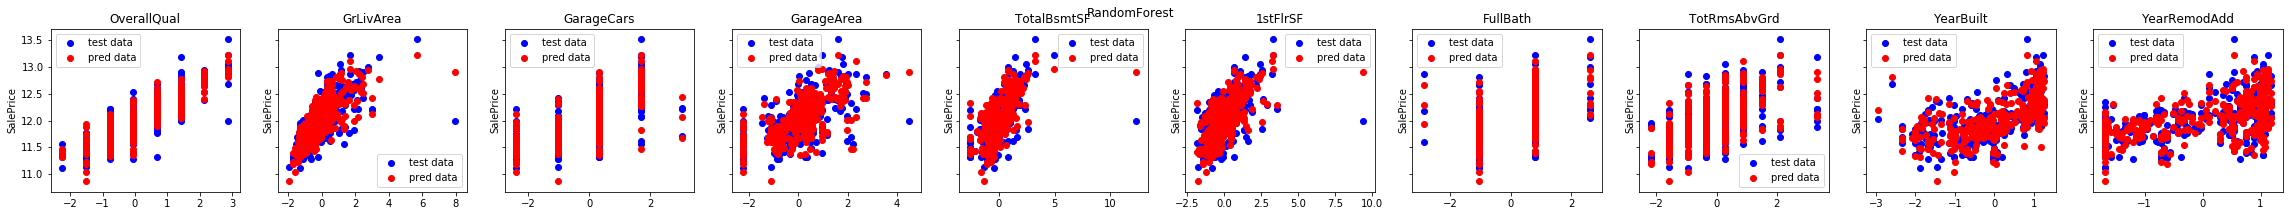

In [62]:
#　error5 error42から目的変数を対数変換
y_train_log, y_test_log = np.log(y_train), np.log(y_test)
Regression(X_train_trans, X_test_trans, y_train_log, y_test_log, feature_lst)

In [63]:
# 含められる変数を増やして検証
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [64]:
# 多数のデータが欠損している'MiscFeature' , 'Fence' , 'PoolQC' , 'Alley'はドロップ
df_drop= df.drop(['MiscFeature' , 'Fence' , 'PoolQC' , 'Alley'], axis=1)
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [65]:
# 数値データで回帰してみる、欠損値は平均値で埋める
feature_lst = []
for column in df_drop.columns:
    if df_drop[column].dtype == 'object' or column == 'SalePrice' or column == 'SalePrice_log':
        continue
    else:
        feature_lst.append(column)
        df_drop[column].fillna(df_drop[column].mean(), inplace=True)
print(feature_lst)
for column in feature_lst:
    print(df_drop[column].dtype)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
int64
float64
int64
int64
int64
int64
int64
float64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
float64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64


In [66]:
# error6
# 数値データで検証、欠損値は平均値で埋める
df_4 = df_drop.loc[:, feature_lst + ['SalePrice']]
df_4.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,23.994583,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.506164,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [67]:
X4 = df_4.iloc[:, 0:len(feature_lst)].values
y4 = df_4.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X4, y4, random_state=0, test_size=0.25)
# 標準化
from sklearn.preprocessing import StandardScaler
X_train_trans = StandardScaler().fit(X_train).transform(X_train)
X_test_trans = StandardScaler().fit(X_train).transform(X_test)

In [68]:
Regression(X_train_trans, X_test_trans, y_train, y_test, feature_lst)

,LinearRegression,SVM,DecisionTree,RandomForest
mean_squared_error,,,,
error1,2.725908e+09,6.943347e+09,2.911550e+09,2.057106e+09
error2,1.877384e+09,6.948122e+09,1.884085e+09,1.548893e+09
error3,3.273388e-02,2.659804e-02,4.347160e-02,3.306688e-02
error4,2.130448e+09,6.952793e+09,1.704227e+09,1.228392e+09
error5,3.880275e-02,2.210765e-02,4.817972e-02,2.550681e-02
error6,2.107850e+09,6.955510e+09,1.686098e+09,1.126456e+09


特徴量10個時より、RandomForestの誤差が更に減少している

In [69]:
#　error7 error6から目的変数を対数変換
y_train_log, y_test_log = np.log(y_train), np.log(y_test)
Regression(X_train_trans, X_test_trans, y_train_log, y_test_log, feature_lst)

,LinearRegression,SVM,DecisionTree,RandomForest
mean_squared_error,,,,
error1,2.725908e+09,6.943347e+09,2.911550e+09,2.057106e+09
error2,1.877384e+09,6.948122e+09,1.884085e+09,1.548893e+09
error3,3.273388e-02,2.659804e-02,4.347160e-02,3.306688e-02
error4,2.130448e+09,6.952793e+09,1.704227e+09,1.228392e+09
error5,3.880275e-02,2.210765e-02,4.817972e-02,2.550681e-02
error6,2.107850e+09,6.955510e+09,1.686098e+09,1.126456e+09
error7,3.687649e-02,2.625189e-02,4.172258e-02,2.308439e-02


In [70]:
# objectのデータ確認
for column in df_drop.columns:
    if df_drop[column].dtype == 'object':
        print(df_drop[column].value_counts())

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
Norm      1260
Feedr       81
Artery     

In [71]:
# dtype='object'で順序性のある特徴量は点数化
df_drop['LotShape']=df_drop['LotShape'].map({'Reg':4, 'IR1':3, 'IR2':2, 'IR3':1})
df_drop['LandContour']=df_drop['LandContour'].map({'Lvl':4, 'Bnk':3, 'HLS':2, 'Low':1})
df_drop['Utilities'] = df_drop['Utilities'].map({'AllPub':4, 'NoSewr':3, 'NoSeWa':2, 'ELO':1})
df_drop['LandSlope'] = df_drop['LandSlope'].map({'Gtl':3,'Mod':2, 'Sev':1})
df_drop['ExterQual'] = df_drop['ExterQual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1})
df_drop['ExterCond'] = df_drop['ExterCond'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1})
df_drop['BsmtQual'] = df_drop['BsmtQual'].fillna('NA')
df_drop['BsmtQual'] = df_drop['BsmtQual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0})
df_drop['BsmtCond'] = df_drop['BsmtCond'].fillna('NA')
df_drop['BsmtCond'] = df_drop['BsmtCond'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0})
df_drop['BsmtExposure'] = df_drop['BsmtExposure'].fillna('NA')
df_drop['BsmtExposure'] = df_drop['BsmtExposure'].map({'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'NA':0})
df_drop['BsmtFinType1'] = df_drop['BsmtFinType1'].fillna('NA')
df_drop['BsmtFinType1'] = df_drop['BsmtFinType1'].map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0})
df_drop['BsmtFinType2'] = df_drop['BsmtFinType2'].fillna('NA')
df_drop['BsmtFinType2'] = df_drop['BsmtFinType2'].map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0})
df_drop['HeatingQC'] = df_drop['HeatingQC'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1})
df_drop['KitchenQual'] = df_drop['KitchenQual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1})
df_drop['Functional'] = df_drop['Functional'].map({'Typ':7, 'Min1':6, 'Min2':5, 'Mod':4, 'Maj1':3, 'Maj2':2, 'Sev':1, 'Sal':0})
df_drop['FireplaceQu'] = df_drop['FireplaceQu'].fillna('NA')
df_drop['FireplaceQu'] = df_drop['FireplaceQu'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0})
df_drop['GarageFinish'] = df_drop['GarageFinish'].fillna('NA')
df_drop['GarageFinish'] = df_drop['GarageFinish'].map({'Fin':3, 'RFn':2, 'Unf':1, 'NA':0})
df_drop['GarageQual'] = df_drop['GarageQual'].fillna('NA')
df_drop['GarageQual'] = df_drop['GarageQual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0})
df_drop['GarageCond'] = df_drop['GarageCond'].fillna('NA')
df_drop['GarageCond'] = df_drop['GarageCond'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0})
df_drop['CentralAir'] = df_drop['CentralAir'].map({'Y':1, 'N':0})

In [72]:
# 上記変換したobject以外は検証から除外,欠損は平均値で埋める
feature_lst = []
for column in df_drop.columns:
    if df_drop[column].dtype == 'object' or column == 'SalePrice' or column == 'SalePrice_log':
        continue
    else:
        feature_lst.append(column)
        df_drop[column].fillna(df_drop[column].mean(), inplace=True)
print(feature_lst)

['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LandContour', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [73]:
# error8
# 数値データに順序性があるobjectデータで検証、欠損値は平均値で埋める
df_5 = df_drop.loc[:, feature_lst + ['SalePrice']]
df_5.describe()

,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.00000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,3.591781,3.814384,3.998630,2.937671,6.099315,5.575342,1971.267808,1984.865753,103.685262,3.39589,3.083562,3.489041,2.934932,1.630137,3.545890,443.639726,1.247260,46.549315,567.240411,1057.429452,4.145205,0.934932,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,3.511644,6.517808,6.841781,0.613014,1.825342,1978.506164,1.715753,1.767123,472.980137,2.810274,2.808904,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.024023,9981.264932,0.582296,0.606509,0.052342,0.276232,1.382997,1.112799,30.202904,20.645407,180.569112,0.57428,0.351054,0.876478,0.552159,1.067391,2.107776,456.098091,0.892332,161.319273,441.866955,438.705324,0.959501,0.246731,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,0.663760,1.625393,0.667698,0.644666,1.810877,23.994583,0.892831,0.747315,213.804841,0.722898,0.719685,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,2.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,0.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,3.000000,4.000000,4.000000,3.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,3.00000,3.000000,3.000000,3.000000,1.000000,1.000000,0.000000,1.000000,0.000000,223.000000,795.750000,3.000000,1.000000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,5.000000,7.000000,0.000000,0.000000,1962.000000,1.000000,1.000000,334.500000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,70.049958,9478.500000,4.000000,4.000000,4.000000,3.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,3.00000,3.000000,4.000000,3.000000,1.000000,4.000000,383.500000,1.000000,0.000000,477.500000,991.500000,5.000000,1.000000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,3.000000,6.000000,7.000000,1.000000,2.000000,1978.506164,2.000000,2.000000,480.000000,3.000000,3.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000

In [74]:
X5 = df_5.iloc[:, 0:len(feature_lst)].values
y5 = df_5.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X5, y5, random_state=0, test_size=0.25)
# 標準化
from sklearn.preprocessing import StandardScaler
X_train_trans = StandardScaler().fit(X_train).transform(X_train)
X_test_trans = StandardScaler().fit(X_train).transform(X_test)

In [75]:
Regression(X_train_trans, X_test_trans, y_train, y_test, feature_lst)

,LinearRegression,SVM,DecisionTree,RandomForest
mean_squared_error,,,,
error1,2.725908e+09,6.943347e+09,2.911550e+09,2.057106e+09
error2,1.877384e+09,6.948122e+09,1.884085e+09,1.548893e+09
error3,3.273388e-02,2.659804e-02,4.347160e-02,3.306688e-02
error4,2.130448e+09,6.952793e+09,1.704227e+09,1.228392e+09
error5,3.880275e-02,2.210765e-02,4.817972e-02,2.550681e-02
error6,2.107850e+09,6.955510e+09,1.686098e+09,1.126456e+09
error7,3.687649e-02,2.625189e-02,4.172258e-02,2.308439e-02
error8,1.929278e+09,6.955433e+09,1.507560e+09,1.147031e+09


特徴量10個時より、RandomForestの誤差が更に減少している

In [76]:
#　error9 error8から目的変数を対数変換
y_train_log, y_test_log = np.log(y_train), np.log(y_test)
Regression(X_train_trans, X_test_trans, y_train_log, y_test_log, feature_lst)

,LinearRegression,SVM,DecisionTree,RandomForest
mean_squared_error,,,,
error1,2.725908e+09,6.943347e+09,2.911550e+09,2.057106e+09
error2,1.877384e+09,6.948122e+09,1.884085e+09,1.548893e+09
error3,3.273388e-02,2.659804e-02,4.347160e-02,3.306688e-02
error4,2.130448e+09,6.952793e+09,1.704227e+09,1.228392e+09
error5,3.880275e-02,2.210765e-02,4.817972e-02,2.550681e-02
error6,2.107850e+09,6.955510e+09,1.686098e+09,1.126456e+09
error7,3.687649e-02,2.625189e-02,4.172258e-02,2.308439e-02
error8,1.929278e+09,6.955433e+09,1.507560e+09,1.147031e+09
error9,3.292678e-02,2.659764e-02,3.872771e-02,2.030445e-02


特徴量を大きく増やしても誤差が大きく縮小しているわけではない
個別の特徴量ごとに採用の有無、数値の設定の仕方をより工夫していく必要がある